In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding ,GRU
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import os


In [ ]:
# Load dataset (assuming a CSV file with a column 'number')
def load_data(file_path):
    df = pd.read_csv(file_path, header=None, names=['number'])
    df['parity'] = df['number'] % 2  # 0 for even, 1 for odd
    return df

In [ ]:
feature_file = 'processed_features.csv'
file_path = 'random_numbers.csv'
history_size = 32

In [ ]:

if os.path.exists(feature_file):
    print("Loading precomputed features...")
    feature_data = pd.read_csv(feature_file, header=None)
    X = feature_data.iloc[:, :-1].values
    y = feature_data.iloc[:, -1].values
else:
    print("Processing features from scratch...")
    data = load_data(file_path)

    X, y = [], []
    for i in range(history_size, len(data) - 1):  # Ensure next value is available
        # Features: Only last 'history_size' parity values
        features = data['parity'].iloc[i-history_size:i].values  # Only parity values
        X.append(features)

        # Target: Parity of the next number
        y.append(data['parity'].iloc[i + 1])

    X, y = np.array(X), np.array(y)

    # Save processed features
    feature_df = pd.DataFrame(np.column_stack((X, y)))
    feature_df.to_csv(feature_file, index=False, header=False)




Processing features from scratch...


In [ ]:

# Train-test split (50% training, 50% testing)
train_size = int(len(X) * 0.5)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Store results
results = {}

In [ ]:
print(X[:5])

[[0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0]
 [1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0]
 [1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1]
 [1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1]]


In [ ]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.5035
Random Forest Accuracy: 0.7455
Neural Network Accuracy: 0.7501


In [ ]:
# LSTM Model (without Embedding)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)
lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)[1]
print(f'LSTM Accuracy: {lstm_accuracy:.4f}')

# BiLSTM Model (without Embedding)
bilstm_model = Sequential([
    Bidirectional(LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], 1))),
    Dense(1, activation='sigmoid')
])
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)
bilstm_accuracy = bilstm_model.evaluate(X_test_reshaped, y_test, verbose=2)[1]
print(f'BiLSTM Accuracy: {bilstm_accuracy:.4f}')

# GRU Model (without Embedding)
gru_model = Sequential([
    GRU(32, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=2)
gru_accuracy = gru_model.evaluate(X_test_reshaped, y_test, verbose=2)[1]
print(f'GRU Accuracy: {gru_accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Accuracy: 0.4998
31250/31250 - 219s - 7ms/step - accuracy: 0.4996 - loss: 0.6932
BiLSTM Accuracy: 0.4996
Epoch 1/10
31250/31250 - 492s - 16ms/step - accuracy: 0.4990 - loss: 0.6933
Epoch 2/10
31250/31250 - 478s - 15ms/step - accuracy: 0.5008 - loss: 0.6932
Epoch 3/10
31250/31250 - 501s - 16ms/step - accuracy: 0.5002 - loss: 0.6932
Epoch 4/10
31250/31250 - 476s - 15ms/step - accuracy: 0.5001 - loss: 0.6932
Epoch 5/10
31250/31250 - 504s - 16ms/step - accuracy: 0.5142 - loss: 0.6911
Epoch 6/10
31250/31250 - 502s - 16ms/step - accuracy: 0.6354 - loss: 0.6324
Epoch 7/10
31250/31250 - 480s - 15ms/step - accuracy: 0.7490 - loss: 0.5658
Epoch 8/10
31250/31250 - 499s - 16ms/step - accuracy: 0.7496 - loss: 0.5637
Epoch 9/10
31250/31250 - 504s - 16ms/step - accuracy: 0.7496 - loss: 0.5633
Epoch 10/10
31250/31250 - 480s - 15ms/step - accuracy: 0.7496 - loss: 0.5632
31250/31250 - 147s - 5ms/step - accuracy: 0.7501 - loss: 0.5626
GRU Accuracy: 0.7501


<ipython-input-2-d2b532dfd14a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


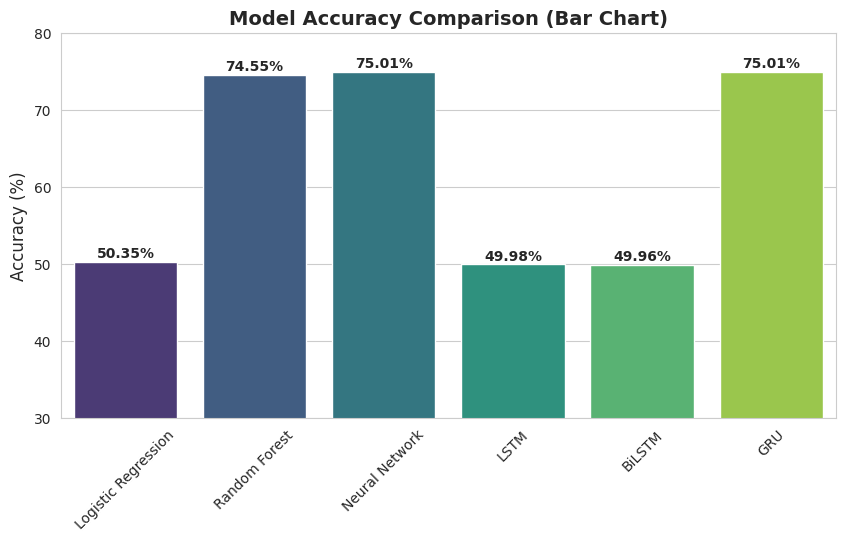

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy results (converted to %)
results = {
    'Logistic Regression': round(0.5035 * 100, 2),
    'Random Forest': round(0.7455 * 100, 2),
    'Neural Network': round(0.7501 * 100, 2),
    'LSTM': round(0.4998 * 100, 2),
    'BiLSTM': round(0.4996 * 100, 2),
    'GRU': round(0.7501 * 100, 2)
}

model_names = list(results.keys())
accuracies = list(results.values())

# Set style
sns.set_style("whitegrid")

# Create Bar Graph
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison (Bar Chart)", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(30,80 )
plt.xticks(rotation=45)

# Add text labels on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


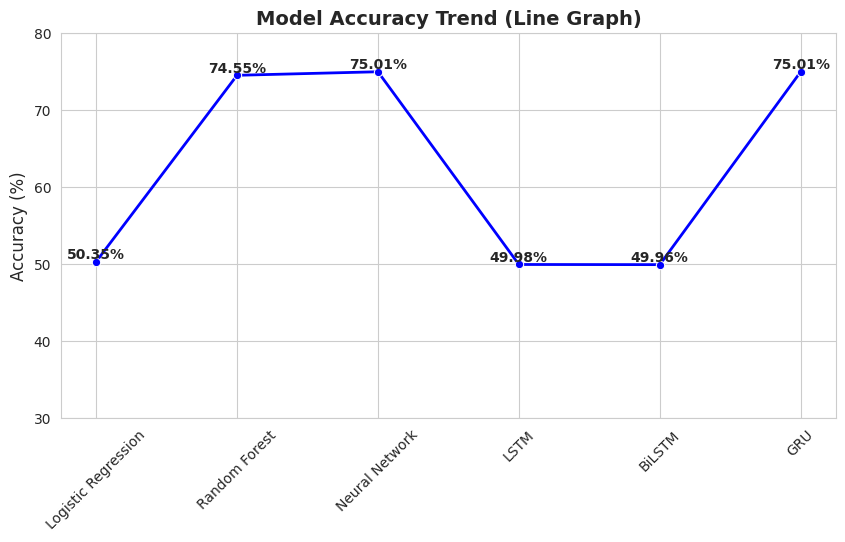

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=model_names, y=accuracies, marker="o", color="b", linewidth=2)

plt.title("Model Accuracy Trend (Line Graph)", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(30,80 )
plt.xticks(rotation=45)

# Add text labels
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.3, f"{v}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


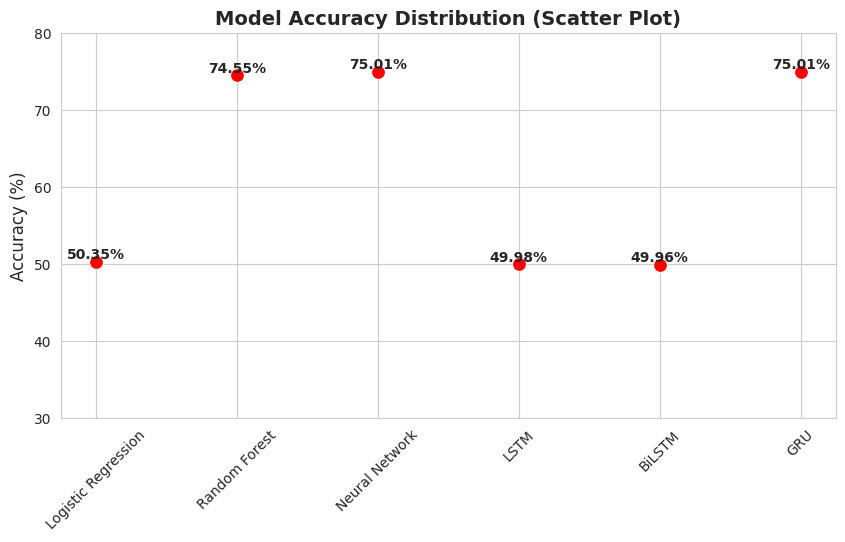

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=model_names, y=accuracies, color="r", s=100)

plt.title("Model Accuracy Distribution (Scatter Plot)", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(30,80 )
plt.xticks(rotation=45)

# Add text labels
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.3, f"{v}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


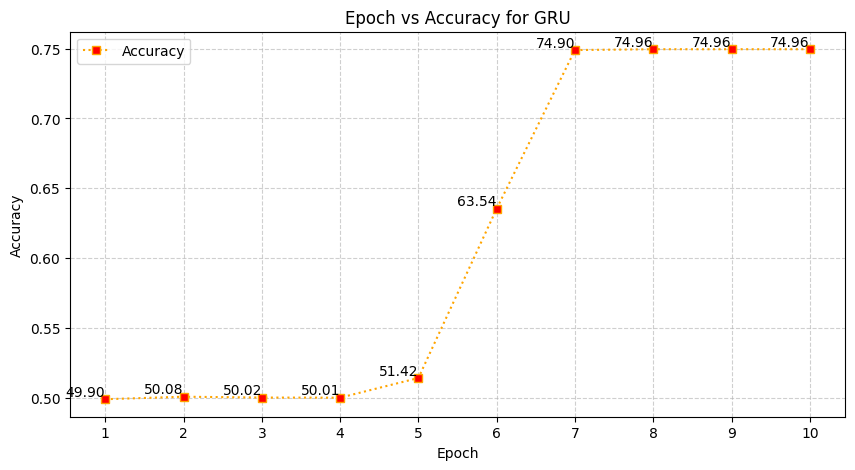

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
accuracy = [0.4990, 0.5008, 0.5002, 0.5001, 0.5142, 0.6354, 0.7490, 0.7496, 0.7496, 0.7496]
loss = [0.6933, 0.6932, 0.6932, 0.6932, 0.6911, 0.6324, 0.5658, 0.5637, 0.5633, 0.5632]

# Create plot
plt.figure(figsize=(10, 5))

# Plot accuracy with orange dotted line and red square markers
plt.plot(epochs, accuracy, linestyle='dotted', color='orange', marker='s',
         markerfacecolor='red', markersize=6, label='Accuracy')

# Annotate each point with accuracy values
for x, y in zip(epochs, accuracy):
    plt.text(x, y, f"{y*100:.2f}", fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy for GRU')

# Ensure all epoch numbers (1-10) are visible
plt.xticks(epochs)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.show()

